In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
from scipy.io import loadmat
import mat73
import speckleret as spr

data_path = 'C:/ML/datasets/data_f_60mm_good.mat'
# data_path = 'C:/ML/datasets/data_base_CP_CL_f_60mm_2_cameras_6_6.mat'

In [2]:
CL = loadmat(data_path)['CL']
CP = loadmat(data_path)['CP']

print(len(CL), len(CL[0]), CL[0][0].shape)
print(len(CP), len(CP[0]), CP[0][0].shape)

1 100 (512, 512)
1 100 (801, 801)


10.430112387527624


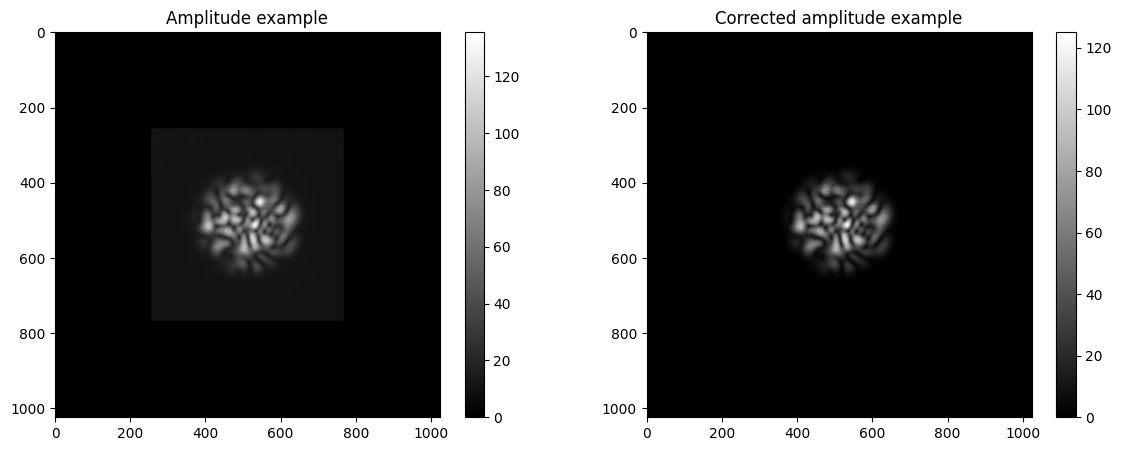

In [3]:
noise_corr = spr.utils.extract_noise_correction(CL, mask_trsh=0.02, plot_result=True)
print(noise_corr)

In [219]:
centroids_CP = spr.utils.extract_average_centroid(CP)
centroids_CL = spr.utils.extract_average_centroid(CL)
centroids_CP_ind = spr.utils.extract_average_centroid(CP, from_individuals=True)
centroids_CL_ind = spr.utils.extract_average_centroid(CL, from_individuals=True)

print(f"Average centroid CP: {centroids_CP}")
print(f"Average centroid CL: {centroids_CL}")

Average centroid CP: (406.1723723897356, 414.1806747668517)
Average centroid CL: (252.97837852154788, 253.63111429375599)


Shapes: Object=(628, 628), Fourier=(628, 628)


Text(0.5, 1.0, 'R=Computed, G=Measured, B=Computed (flat phase)')

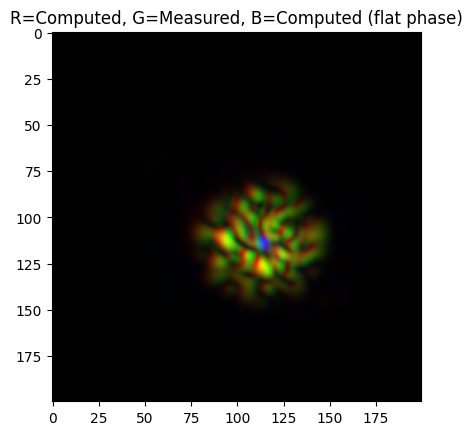

In [344]:
idx = 7
random: bool = True
if random:
    idx = np.random.randint(0, len(CP[0]))

field = CP[0][idx]
# centroids_CP = spr.utils.get_centroid(field)
CP_shift = (np.array(centroids_CP_ind) - np.array(field.shape) / 2).astype(int)
field = np.roll(field, shift=-CP_shift, axis=(0,1))
field = field[86:-87, 86:-87]
field = field / np.sqrt(np.sum(np.square(np.abs(field))))

ft = np.sqrt(CL[0][idx]) - noise_corr
# centroids_CL = spr.utils.get_centroid(ft)
CL_shift = (np.array(centroids_CL_ind) - np.array(ft.shape) / 2).astype(int)
ft = np.roll(ft, shift=-CL_shift, axis=(0,1))
ft = spr.utils.bin_image(ft, newshape=(128, 128))
ft = spr.transforms.pad_img(ft, 3.92)
ft = ft / np.sqrt(np.sum(np.square(np.abs(ft))))
print(f"Shapes: Object={field.shape}, Fourier={ft.shape}")

# _ = spr.plots.compare_arrays(field, ft, cmap='gray')

ft_field = spr.transforms.fourier_transform(field)
ft_field_flat = spr.transforms.fourier_transform(np.abs(field))
_ = spr.plots.rgb_imshow([np.abs(ft_field[200:400, 200:400])*0.5, np.abs(ft[200:400, 200:400])*0.5, np.abs(ft_field_flat[200:400, 200:400])])
plt.title("R=Computed, G=Measured, B=Computed (flat phase)")

In [259]:
centros_CL = np.zeros(shape=(len(CP[0]), 2))
centros_CP = np.zeros(shape=(len(CP[0]), 2))
for i in range(len(CP[0])):
    centros_CP[i, :] = np.array(spr.utils.get_centroid(CP[0][i]))
    centros_CL[i, :] = np.array(spr.utils.get_centroid(np.sqrt(CL[0][i])))

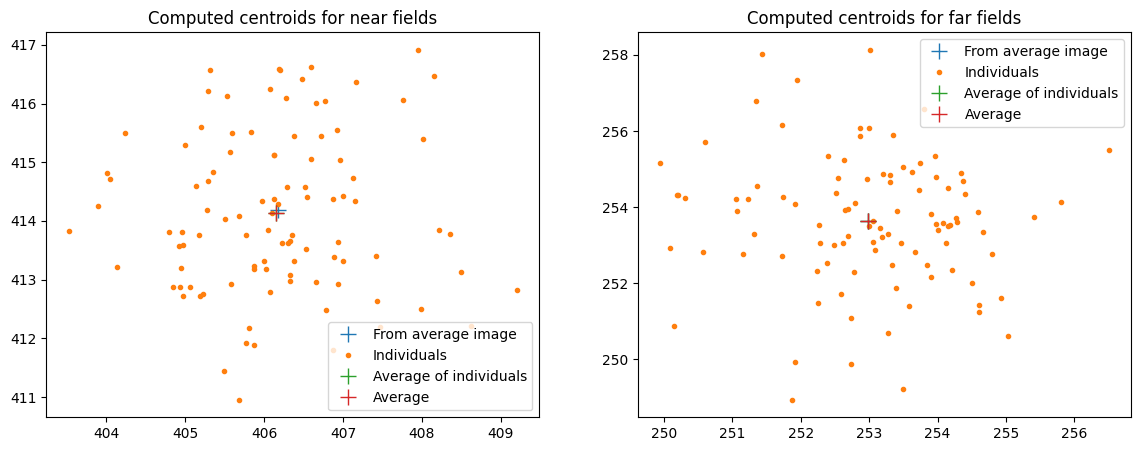

In [260]:
fig, axs = plt.subplots(1, 2, figsize=(14,5))
axs[0].plot(centroids_CP[0], centroids_CP[1], linestyle='None', marker='+', markersize=12, label='From average image')
axs[0].plot(centros_CP[:,0], centros_CP[:,1], linestyle='None', marker='.', label='Individuals')
axs[0].plot(np.mean(centros_CP[:,0]), np.mean(centros_CP[:,1]), linestyle='None', marker='+', markersize=12, label='Average of individuals')
axs[0].plot(centroids_CP_ind[0], centroids_CP_ind[1], linestyle='None', marker='+', markersize=12, label='Average')
axs[1].plot(centroids_CL[0], centroids_CL[1], linestyle='None', marker='+', markersize=12, label='From average image')
axs[1].plot(centros_CL[:,0], centros_CL[:,1], linestyle='None', marker='.', label='Individuals')
axs[1].plot(np.mean(centros_CL[:,0]), np.mean(centros_CL[:,1]), linestyle='None', marker='+', markersize=12, label='Average of individuals')
axs[1].plot(centroids_CL_ind[0], centroids_CL_ind[1], linestyle='None', marker='+', markersize=12, label='Average')

axs[0].set_title('Computed centroids for near fields')
axs[1].set_title('Computed centroids for far fields')
axs[0].legend()
axs[1].legend()